Ejercicio de Regresión Linea. 

Uilizaremos regresión lineal múltiple para modelar la relación entre las características del vehículo y su eficiencia.




Comenzamos importando las librerías necesarias.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

Generamos datos sintéticos para reproducibilidad.

In [2]:
np.random.seed(42)
n_samples = 500

Añadimos las características (Features).

In [3]:
battery_capacity = np.random.uniform(40, 100, n_samples)  # kWh
vehicle_weight = np.random.uniform(1000, 2500, n_samples)  # kg
driving_conditions = np.random.choice(["city", "hwy"], n_samples)  # 0=ciudad, 1=autopista
temperature = np.random.uniform(-10, 35, n_samples)  # °C

Target (eficiencia en km/kWh) con una relación lineal + ruido

In [4]:
efficiency = (
    0.8 * battery_capacity 
    - 0.002 * vehicle_weight 
    + 0.5 * (driving_conditions == "hwy") 
    - 0.01 * temperature 
    + np.random.normal(0, 2, n_samples)
)


Creamos el DataFrame en el que trabajaremos.

In [5]:
df = pd.DataFrame({
    "Battery Capacity (kWh)": battery_capacity,
    "Vehicle Weight (kg)": vehicle_weight,
    "Driving Conditions (city/hwy)": driving_conditions,
    "Temperature (C)": temperature,
    "Efficiency (km/kWh)": efficiency
})

Realizamos el procesamiento y lo imprimimos.

In [6]:
# Codificar 'Driving Conditions' (city=0, hwy=1)
df["Driving Conditions (city/hwy)"] = df["Driving Conditions (city/hwy)"].map({"city": 0, "hwy": 1})

# Separar features y target
X = df.drop("Efficiency (km/kWh)", axis=1)
y = df["Efficiency (km/kWh)"]

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalar features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Entrenar modelo ---
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# --- Evaluar el modelo ---
y_pred = model.predict(X_test_scaled)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Resultados del Modelo:")
print(f"- MAE (Error Absoluto Medio): {mae:.2f}")
print(f"- MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"- R² (Coeficiente de Determinación): {r2:.2f}")

Resultados del Modelo:
- MAE (Error Absoluto Medio): 1.61
- MSE (Error Cuadrático Medio): 4.04
- R² (Coeficiente de Determinación): 0.98


Visualización.

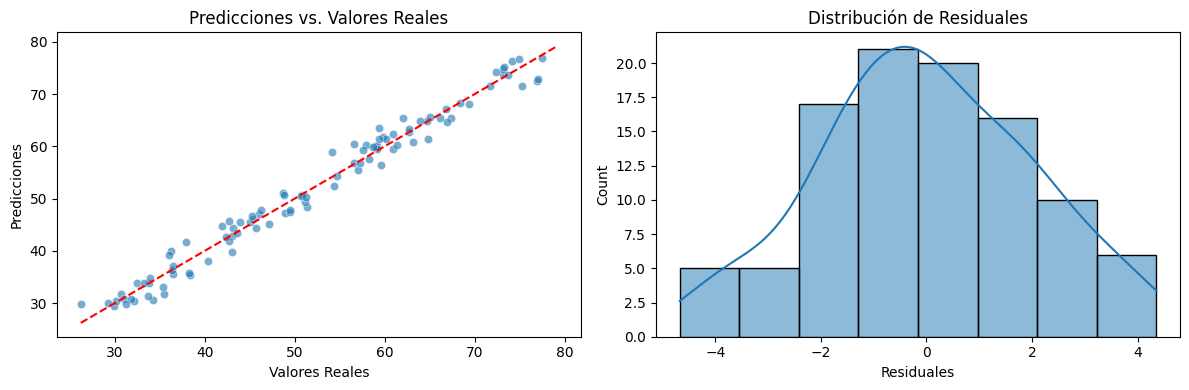

In [7]:
plt.figure(figsize=(12, 4))

# Gráfico 1: Predicciones vs. Reales
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores Reales")

# Gráfico 2: Residuales
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuales")
plt.title("Distribución de Residuales")

plt.tight_layout()
plt.show()

Coeficientes del Modelo.

In [8]:
print("\nCoeficientes del Modelo:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"- {feature}: {coef:.2f}")
print(f"- Intercepto: {model.intercept_:.2f}")


Coeficientes del Modelo:
- Battery Capacity (kWh): 14.42
- Vehicle Weight (kg): -0.75
- Driving Conditions (city/hwy): 0.37
- Temperature (C): -0.09
- Intercepto: 52.99


Ejemplo de Predicción.

In [9]:
new_data = pd.DataFrame({
    "Battery Capacity (kWh)": [75],
    "Vehicle Weight (kg)": [1800],
    "Driving Conditions (city/hwy)": ["hwy"],
    "Temperature (C)": [25]
})

Preprocesamos los nuevos datos y predecimos.

In [10]:
# Preprocesar nuevos datos
new_data["Driving Conditions (city/hwy)"] = new_data["Driving Conditions (city/hwy)"].map({"city": 0, "hwy": 1})
new_data_scaled = scaler.transform(new_data)

# Predecir
prediction = model.predict(new_data_scaled)
print(f"\nPredicción de eficiencia para nuevos datos: {prediction[0]:.2f} km/kWh")


Predicción de eficiencia para nuevos datos: 57.00 km/kWh
